In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns 

ModuleNotFoundError: No module named 'imblearn'

For first dataset, name: Heart Disease Health Indicators Dataset from"https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/code" 

In [ ]:
df1 = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df1.dataframeName = 'heart_disease_health_indicators_BRFSS2015.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 253680 rows and 22 columns


In [ ]:
df1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# preprocessing

Instructions: Describe:

1, how the missing values are handled.

2, conversion of textual and categorical data into numerical values (if needed).

3, how the data is splitted into train, validation and test sets.

4, the features (=input) and labels (=output), and.

5, how the features are normalized or scaled.

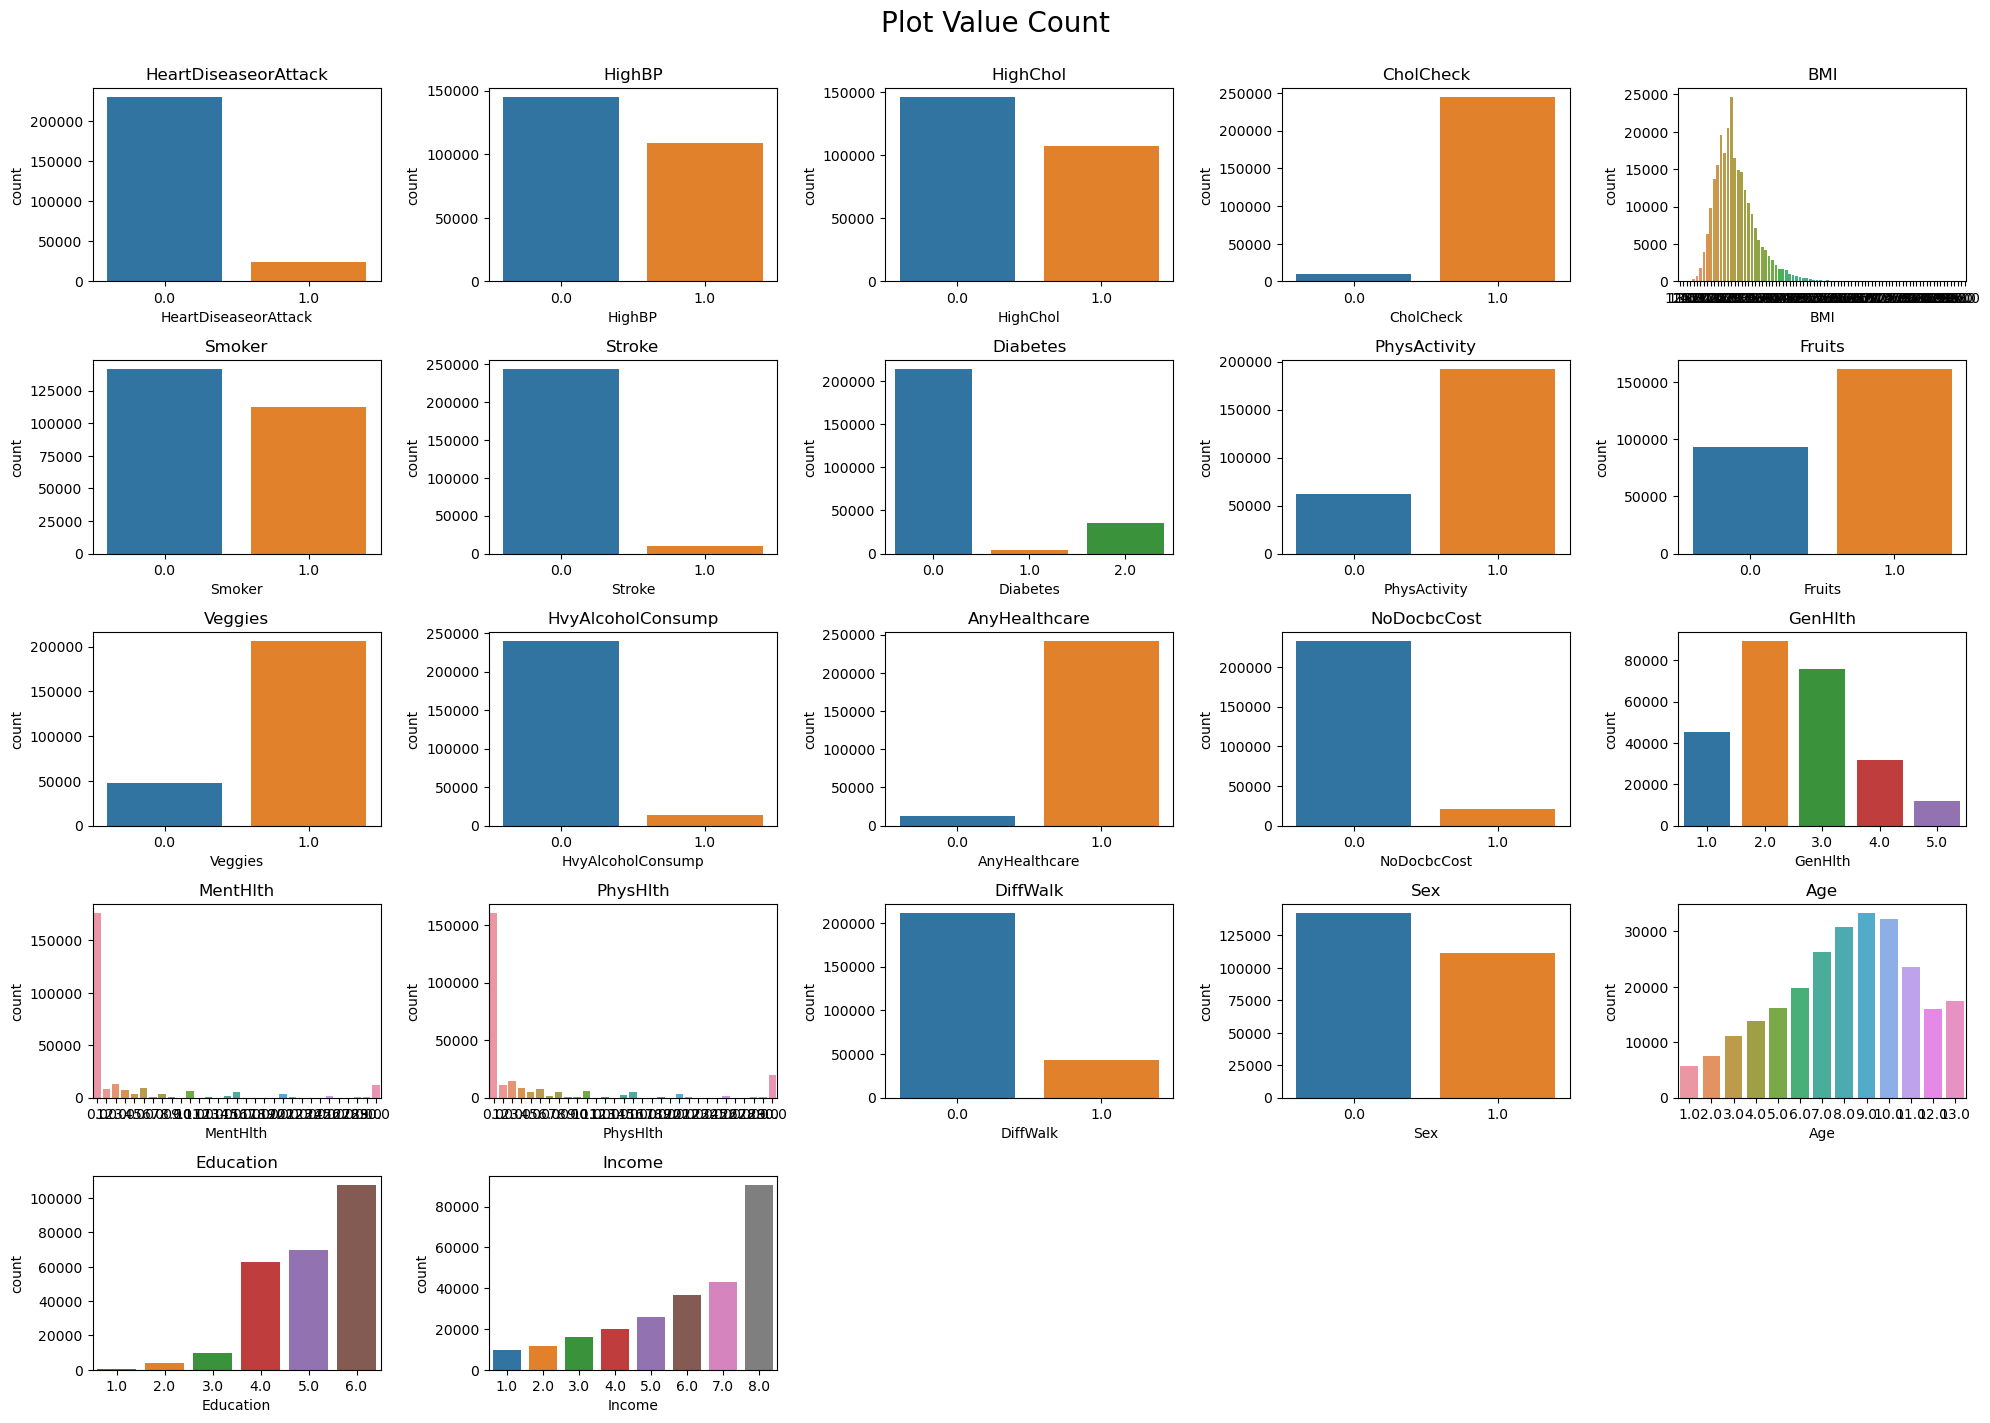

In [ ]:
# Countplot on each feature
plt.figure(figsize=(20,60))
for i,column in enumerate(df1.columns):
    plt.subplot(len(df1.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df1, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

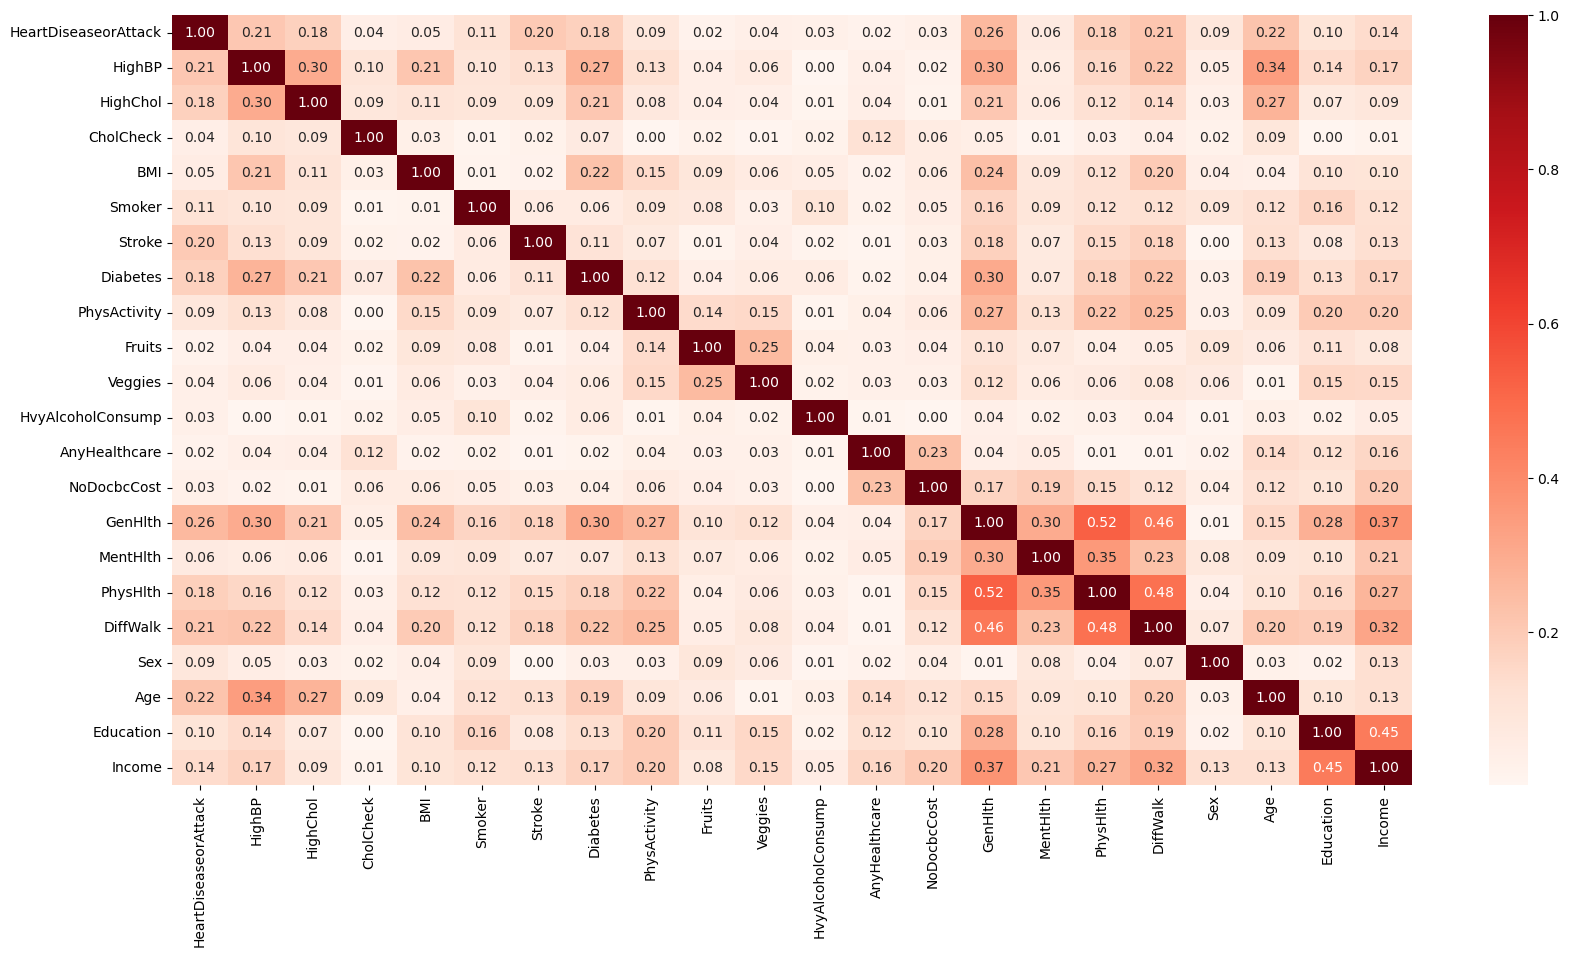

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(df1.corr()),annot=True,fmt='.2f', cmap='Reds')
plt.show()   # See roughly the correlation of variables

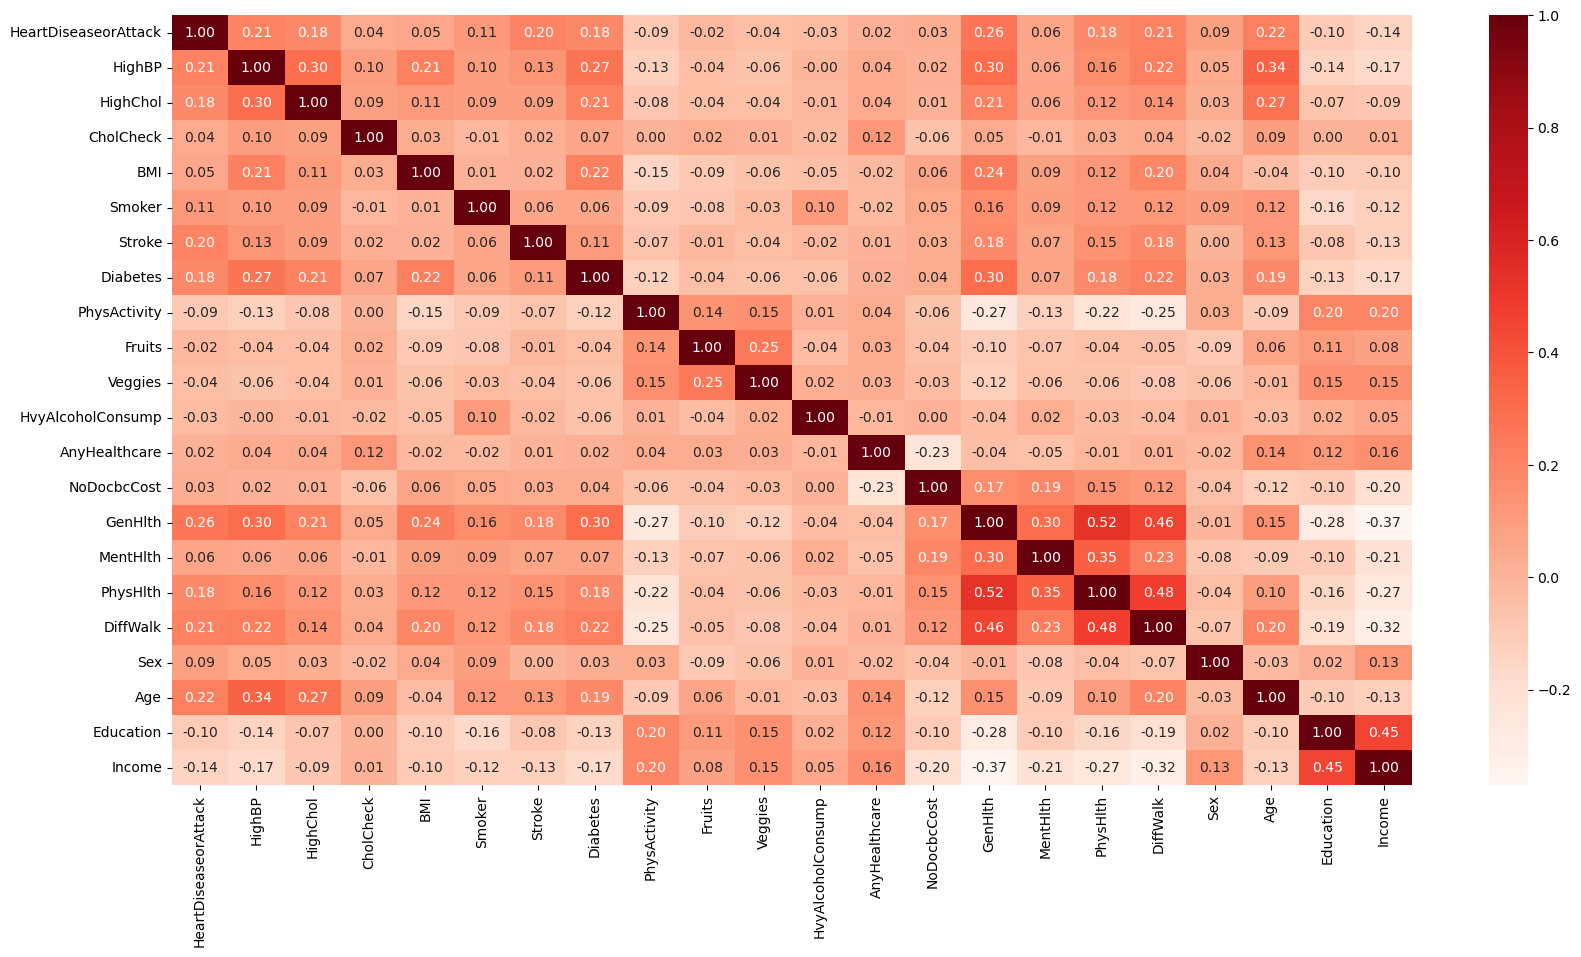

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,fmt='.2f', cmap='Reds')
plt.show()   # See roughly the correlation of variables

# Data Spliting

In [ ]:
df1.isnull().sum()


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
print(df1.columns)
print("no. of column = ", len(df1.columns)) 

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
no. of column =  22


In [ ]:
#data spliting
x=df1.drop(['HeartDiseaseorAttack', 'Education', 'Income'], axis=1) #drop these column
y=df1['HeartDiseaseorAttack'] #output
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) #output we get
y_train.value_counts() # Count the number of people who had heart disease and those who did not

0.0    160974
1.0     16602
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:

sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)
y_train.value_counts()

0.0    160974
1.0    160974
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
df2["target"] = [1 if i == 1.0 else 0 for i in df2.target]
df2.head()

,target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


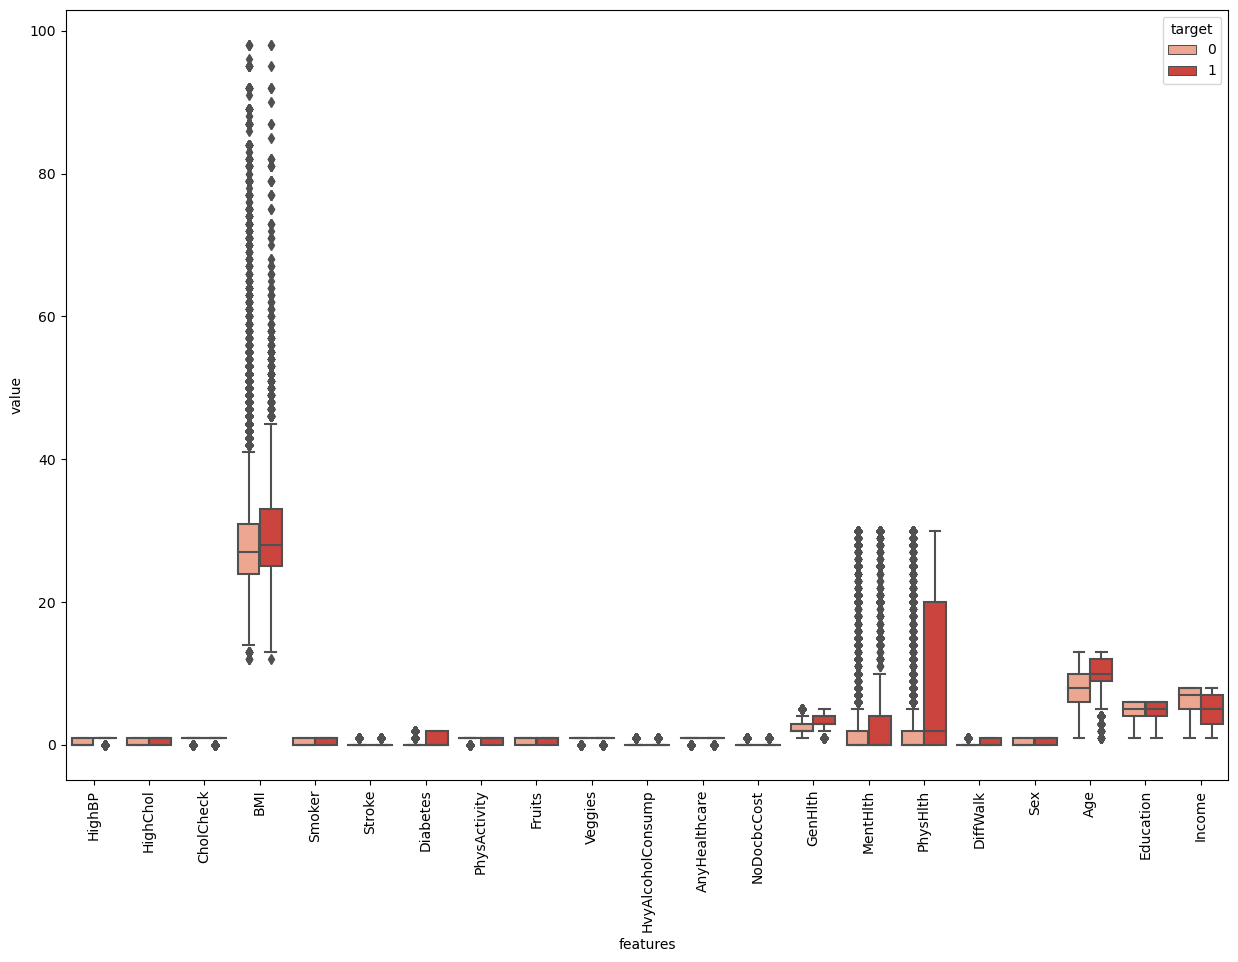

In [ ]:
# There some correlated features
# box plot 
data_melted = pd.melt(df2, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure(figsize=(15,10))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted, palette='Reds')
plt.xticks(rotation = 90)
plt.show()

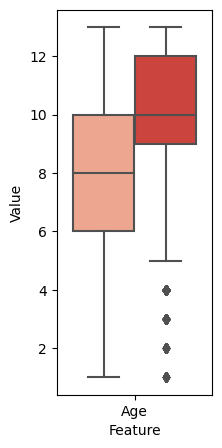

In [ ]:
# There some correlated features
# box plot 
data_melted = pd.melt(df1[['Age', 'HeartDiseaseorAttack']], id_vars = "HeartDiseaseorAttack",
                      var_name = "Feature",
                      value_name = "Value")

plt.figure(figsize=(2,5))

ax1 = sns.boxplot(x = "Feature", y = "Value", hue = "HeartDiseaseorAttack", data = data_melted, palette='Reds')
# plt.xticks(rotation = 90)
ax1.get_legend().remove()
plt.show()

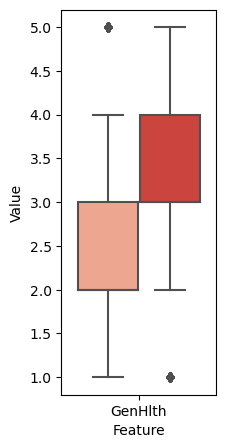

In [ ]:
# There some correlated features
# box plot 
data_melted = pd.melt(df1[['GenHlth', 'HeartDiseaseorAttack']], id_vars = "HeartDiseaseorAttack",
                      var_name = "Feature",
                      value_name = "Value")

plt.figure(figsize=(2,5))

ax1 = sns.boxplot(x = "Feature", y = "Value", hue = "HeartDiseaseorAttack", data = data_melted, palette='Reds')
# plt.xticks(rotation = 90)
ax1.get_legend().remove()
plt.show()

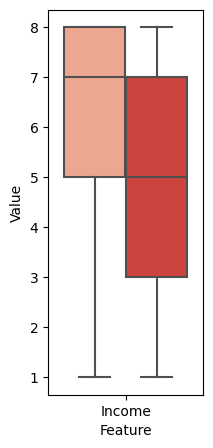

In [ ]:
# There some correlated features
# box plot 
data_melted = pd.melt(df1[['Income', 'HeartDiseaseorAttack']], id_vars = "HeartDiseaseorAttack",
                      var_name = "Feature",
                      value_name = "Value")

plt.figure(figsize=(2,5))

ax1 = sns.boxplot(x = "Feature", y = "Value", hue = "HeartDiseaseorAttack", data = data_melted, palette='Reds')
# plt.xticks(rotation = 90)
ax1.get_legend().remove()
plt.show()

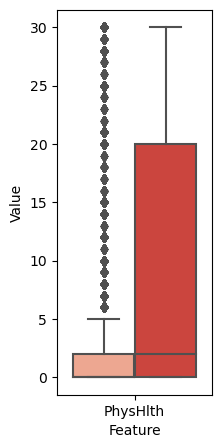

In [ ]:
# There some correlated features
# box plot 
data_melted = pd.melt(df1[['PhysHlth', 'HeartDiseaseorAttack']], id_vars = "HeartDiseaseorAttack",
                      var_name = "Feature",
                      value_name = "Value")

plt.figure(figsize=(2,5))

ax1 = sns.boxplot(x = "Feature", y = "Value", hue = "HeartDiseaseorAttack", data = data_melted, palette='Reds')
# plt.xticks(rotation = 90)
ax1.get_legend().remove()
plt.show()